In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [5]:
df = pd.read_csv('df026_perdag', index_col=0)
df_new = pd.DataFrame(df.perdag_verbruik).dropna()
df_new.index = pd.to_datetime(df_new.index)

In [6]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols = list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = pd.concat(cols, axis=1)
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

df_newer = series_to_supervised(df_new, n_in=1)

In [7]:
df_new['1dag'] = 0

In [8]:
df_new['1dag'][1:] = df_newer[:, -2]

/tmp/ipykernel_40347/1032559208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['1dag'][1:] = df_newer[:, -2]


In [9]:
train = df_new.loc[(df_new.index < '2019-11-01')]
test = df_new.loc[(df_new.index >= '2019-11-01') & (df_new.index < '2019-12-31')]

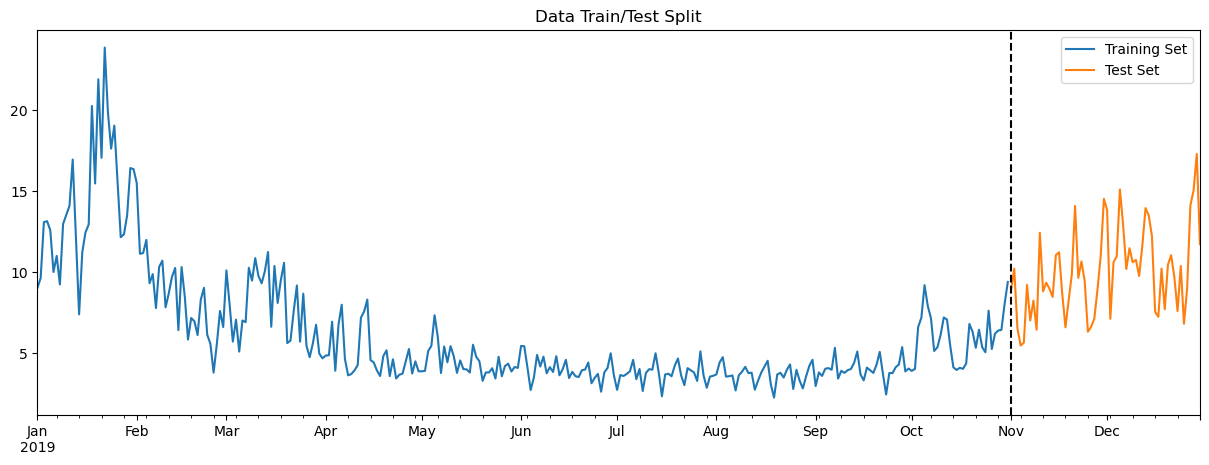

In [10]:
fig, ax = plt.subplots(figsize=(15,5))
train['perdag_verbruik'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test['perdag_verbruik'].plot(ax=ax, label='TestSet')
ax.axvline('2019-11-01', color='black', ls= '--')
ax.legend(['Training Set', 'Test Set'])

plt.show()

In [12]:
def create_features(df):
    
    df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month

    return df

df2 = create_features(df_new)
df2

,perdag_verbruik,1dag,dayofweek,month
2019-01-01,9.0395,0.0000,1,1
2019-01-02,9.6430,9.0395,2,1
2019-01-03,13.0820,9.6430,3,1
2019-01-04,13.1460,13.0820,4,1
2019-01-05,12.5870,13.1460,5,1
...,...,...,...,...
2019-12-26,9.0290,6.8230,3,12
2019-12-27,14.1130,9.0290,4,12
2019-12-28,15.0320,14.1130,5,12
2019-12-29,17.2900,15.0320,6,12


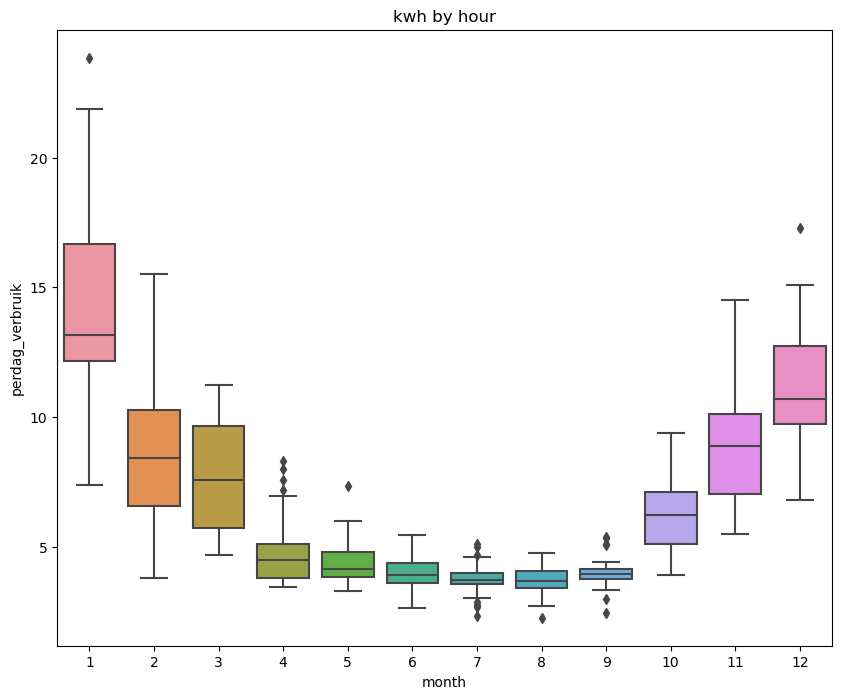

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df2, x='month', y='perdag_verbruik')
ax.set_title('kwh by hour')
plt.show()

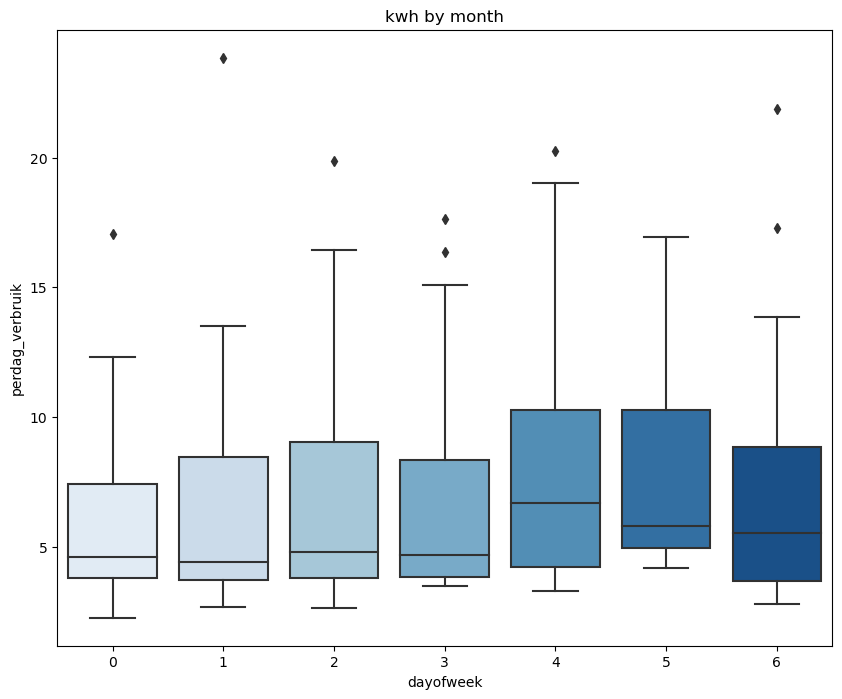

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df2, x='dayofweek', y='perdag_verbruik', palette='Blues')
ax.set_title('kwh by month')
plt.show()